<a href="https://colab.research.google.com/github/Deekshitha-Nellikanti/deekshitha710/blob/master/plantdiseasedetection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)
#here the seeding is done for all the libraries used.
#seeding is basically when the random values are generated
#during the training testing and validation the order of
#the random numbers remains same no matter how many times you run
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models, optimizers

#here all the dependencies are imported, which are required for this

kaggle_credentials=json.load(open('/kaggle.json'))
#here we loaded the contents in the kaggle.json into a variable
#which contains the username and key required for the future access to the dataset

os.environ["KAGGLE_USERNAME"]=kaggle_credentials['username']
os.environ['KAGGLE_KEY']= kaggle_credentials['key']

!kaggle datasets download -d abdallahalidev/plantvillage-dataset
#with this command we dowloaded the zipfile of the dataset where the whole thing is the api command from kaggle

 99% 2.02G/2.04G [00:24<00:00, 63.3MB/s]
100% 2.04G/2.04G [00:24<00:00, 89.7MB/s]


In [4]:
with ZipFile('plantvillage-dataset.zip','r') as zip_ref: #this statement is creating a zipfile object for the dataset ina read mode,zip_ref is the zip object
  zip_ref.extractall() #this step is the extracting of the zipfile



# New Section

['grayscale', 'color', 'segmented']
(256, 256, 3)


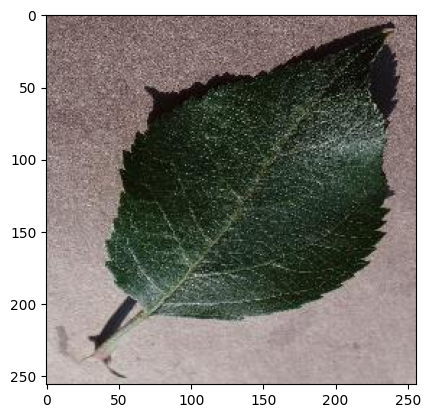

In [5]:
print(os.listdir('plantvillage dataset')) #this shows us the directories in the dataset which are segmented color and grayscale
#print(len(os.listdir('plantvillage dataset/color')))#each directory has 38 directories
#color segmented and grayscale contain the same images of leaf pictures
#color is in rgb form grayscale is in black and white
#print(os.listdir('plantvillage dataset/color/Apple___healthy'))

main_dir='plantvillage dataset/color'
#here we have set a main directory as color directory from the dataset as we will be using only that directory

img_pth='plantvillage dataset/color/Apple___healthy/0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG'
img=mpimg.imread(img_pth)
print(img.shape)
plt.imshow(img)
#plt.axis('on')
#plt.show()

#here we had a look at a picture from the data

In [6]:
img_size=224
batch_size=32


 #. Data generators are used to load data in batches,
 # which is especially useful when working with large datasets that cannot fit entirely into memory.
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )

# this class of image data generator we can iterate the data in batches that is data if looped over.
#here the rescale parameter rescales every value in the data in the range of 0 to 1(normalization)
#the other parameter is validation_split which indicates that the dataset is divided into two training
# and validation where validation set is 20% of the whole data

train_gen=data_gen.flow_from_directory(
    main_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

#create data generators for training and validation data. Data generators are useful when working with large datasets
# that cannot fit into memory all at once during training.
#They allow you to load and preprocess data in batches on-the-fly, which is essential for training deep learning models efficiently.

valid_gen=data_gen.flow_from_directory(
    main_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'#Since this is a categorical classification task (classifying images into multiple classes),
    #the value 'categorical' is used. This means that the labels will be returned as one-hot encoded arrays.
)

 #this function call creates a data generator for loading and preprocessing images
 #from a directory structure, specifically for training a neural network model.
#The images will be resized to a specified target size, loaded in batches, and labeled according to the directory structure.

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [7]:
model=models.Sequential()#we create a sequential model instance here, sequential is basically denotes stack of sequential layers,
#where there is ome input layer hidden layers and a output layer
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(img_size,img_size,3))) #this is hidden layer1 this is a convolutional layer with 32 filters,
#the no of filters makes the model learn more complex patterns, but that also increases the computational complexity, input layer should give the input shape
model.add(layers.MaxPooling2D(2,2))# here this is hidden layer2, this is a pooling layer which decreases the spatial complexity,downsamples the feature maps,
#this selects the maximum value from each subregion

model.add(layers.Conv2D(128,(3,3),activation='relu'))#this is hidden layer3 another convolutional layer with more filters to learn more complex patterns
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256,(3,3),activation='relu'))#this is hidden layer3 another convolutional layer with more filters to leran more complex patterns
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())#this is used to rescale the data from 2d to 1d because the next layera are dense layers, which are fully connected layers,
#they expect the data to be in the form of 1d array,this is normalising the data, which makes the process simple and efficient increasing the accuracy
model.add(layers.Dense(512,activation='relu'))#this layer is a dense layer(fully connected layers) where 256 nuerons,which learns the complex relationships
#between the features extracted by the convolutional layers, the relu activation function introduces the non-linearity
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_gen.num_classes,activation='softmax'))# this is the output layer where we pass the no of output classes as this is a multi-class classification.
#this returns the probability of each class for the given input.the softmax output probabilities for each class, indicating the likelihood of the input image belonging to each class.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 256)       0

In [9]:
#compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
 #training the model
model_sum=model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples//batch_size,
    epochs=5,
    validation_data=valid_gen,
    validation_steps=valid_gen.samples//batch_size
)

Epoch 1/5
1358/1358 [==============================] - 188s 130ms/step - loss: 1.2530 - accuracy: 0.6470 - val_loss: 0.5158 - val_accuracy: 0.8377
Epoch 2/5
1358/1358 [==============================] - 176s 130ms/step - loss: 0.5556 - accuracy: 0.8261 - val_loss: 0.3644 - val_accuracy: 0.8861
Epoch 3/5
1358/1358 [==============================] - 181s 133ms/step - loss: 0.3628 - accuracy: 0.8843 - val_loss: 0.3106 - val_accuracy: 0.8976
Epoch 4/5
1358/1358 [==============================] - 176s 130ms/step - loss: 0.2723 - accuracy: 0.9127 - val_loss: 0.2566 - val_accuracy: 0.9197
Epoch 5/5
1358/1358 [==============================] - 176s 129ms/step - loss: 0.2038 - accuracy: 0.9345 - val_loss: 0.2286 - val_accuracy: 0.9289


In [11]:
#evaluating the model
val_loss,val_accuracy=model.evaluate(valid_gen,steps=valid_gen.samples//batch_size)
print(f"validation accuracy:{val_accuracy*100:.2f}%")

339/339 [==============================] - 21s 60ms/step - loss: 0.2286 - accuracy: 0.9289
validation accuracy:92.89%


In [25]:
def process_img(image_path,img_tsize=(224,224)):
  image=Image.open(image_path)#loading the image
  image=image.resize(img_tsize)#resizing the image
  img_array=np.array(image)#converting it into array
  img_array=np.expand_dims(img_array,axis=0)#adjusting the dimensions
  img_array=img_array.astype('float32')/255.
  return img_array

class_indices={v:k for k,v in train_gen.class_indices.items()}
def predict_image_class(model,image_path,class_indices):
  proc_img=process_img(image_path)
  prediction_ratio=model.predict(proc_img)
  predicted_classind=np.argmax(prediction_ratio,axis=1)[0]
  predicted_classname=class_indices[predicted_classind]
  return predicted_classname




In [13]:
print(class_indices)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [30]:
prevention_solution_map = {
    'Apple___Apple_scab':{
        'prevention': '1. Plant resistant varieties.\n2. Prune trees to improve air circulation.\n3. Remove fallen leaves and debris from around the tree.\n4. Apply fungicides as preventive measures before infection occurs.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves and fruits.\n3. Prune trees to improve air circulation.\n4. Maintain good tree hygiene by removing fallen leaves and debris.'
    },
    'Apple___Black_rot':{
        'prevention': '1. Remove and destroy mummified fruits from trees.\n2. Prune trees to improve air circulation.\n3. Apply fungicides during the growing season to prevent infection.\n4. Practice good orchard sanitation.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Prune trees to improve air circulation.\n4. Maintain good tree hygiene by removing mummified fruits and debris.'
    },
    'Apple___Cedar_apple_rust':{
        'prevention': '1. Plant resistant varieties.\n2. Remove nearby cedar trees if possible.\n3. Apply fungicides during the growing season to prevent infection.\n4. Prune trees to improve air circulation.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves and branches.\n3. Remove nearby cedar trees if possible.\n4. Prune trees to improve air circulation.'
    },
    'Apple___healthy':{
        'prevention': 'No specific prevention measures required for healthy apple trees.',
        'solution': 'No specific solution required for healthy apple trees.'
    },
   'Blueberry___healthy':{
        'prevention': 'No specific prevention measures required for healthy blueberry plants.',
        'solution': 'No specific solution required for healthy blueberry plants.'
    },
    'Cherry_(including_sour)___Powdery_mildew':{
        'prevention': '1. Plant resistant varieties.\n2. Provide good air circulation around plants.\n3. Prune trees to open up the canopy.\n4. Apply fungicides as preventive measures during the growing season.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Prune trees to open up the canopy and improve air circulation.'
    },
   'Cherry_(including_sour)___healthy':{
        'prevention': 'No specific prevention measures required for healthy cherry trees.',
        'solution': 'No specific solution required for healthy cherry trees.'
    },
   'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot':{
        'prevention': '1. Use crop rotation and avoid planting corn in the same field consecutively.\n2. Plant resistant varieties.\n3. Use balanced fertilization to maintain plant health.\n4. Apply fungicides when conditions favor disease development.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Use crop rotation and avoid planting corn in the same field consecutively.'
    },
    'Corn_(maize)___Common_rust_':{
        'prevention': '1. Plant resistant varieties.\n2. Use crop rotation to reduce pathogen buildup.\n3. Maintain plant health with proper fertilization and irrigation.\n4. Apply fungicides when conditions favor disease development.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Use crop rotation to reduce pathogen buildup.'
    },
    'Corn_(maize)___Northern_Leaf_Blight':{
        'prevention': '1. Use crop rotation and avoid planting corn in the same field consecutively.\n2. Plant resistant varieties.\n3. Use balanced fertilization to maintain plant health.\n4. Apply fungicides when conditions favor disease development.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Use crop rotation and avoid planting corn in the same field consecutively.'
    },
    'Corn_(maize)___healthy':{
        'prevention': 'No specific prevention measures required for healthy corn plants.',
        'solution': 'No specific solution required for healthy corn plants.'
    },
    'Grape___Black_rot':{
        'prevention': '1. Plant resistant varieties.\n2. Remove and destroy mummified fruits from vines.\n3. Prune vines to improve air circulation.\n4. Apply fungicides during the growing season to prevent infection.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Prune vines to improve air circulation.\n4. Remove and destroy mummified fruits from vines.'
    },
    'Grape___Esca_(Black_Measles)':{
        'prevention': '1. Plant resistant varieties.\n2. Prune vines to improve air circulation and reduce stress.\n3. Apply protective fungicides during the growing season.\n4. Practice good vineyard sanitation.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected wood.\n3. Prune vines to improve air circulation.\n4. Practice good vineyard sanitation.'
    },
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)':{
        'prevention': '1. Plant resistant varieties.\n2. Prune vines to improve air circulation.\n3. Apply protective fungicides during the growing season.\n4. Practice good vineyard sanitation.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves and shoots.\n3. Prune vines to improve air circulation.\n4. Practice good vineyard sanitation.'
    },
    'Grape___healthy':{
        'prevention': 'No specific prevention measures required for healthy grapevines.',
        'solution': 'No specific solution required for healthy grapevines.'
    },
    'Orange___Haunglongbing_(Citrus_greening)':{
        'prevention': '1. Plant disease-free nursery stock.\n2. Control the Asian citrus psyllid vector.\n3. Remove and destroy infected trees.\n4. Use antibacterial sprays to manage the disease.',
        'solution': '1. There is currently no cure for citrus greening. However, practices like managing vector populations and maintaining tree health can help mitigate its impact.\n2. Use antibacterial sprays to manage the disease.'
    },
   'Peach___Bacterial_spot':{
        'prevention': '1. Plant resistant varieties.\n2. Prune trees to improve air circulation.\n3. Apply copper-based fungicides during the growing season.\n4. Avoid overhead irrigation to reduce disease spread.',
        'solution': '1. Use copper-based fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Prune trees to improve air circulation.'
    },
   'Peach___healthy':{
        'prevention': 'No specific prevention measures required for healthy peach trees.',
        'solution': 'No specific solution required for healthy peach trees.'
    },
    'Pepper,_bell___Bacterial_spot':{
        'prevention': '1. Plant resistant varieties.\n2. Avoid overhead irrigation to reduce disease spread.\n3. Apply copper-based fungicides during the growing season.\n4. Practice crop rotation and field sanitation.',
        'solution': '1. Use copper-based fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Practice crop rotation and field sanitation.'
    },
    'Pepper,_bell___healthy':{
        'prevention': 'No specific prevention measures required for healthy bell pepper plants.',
        'solution': 'No specific solution required for healthy bell pepper plants.'
    },
   'Potato___Early_blight':{
        'prevention': '1. Plant resistant varieties.\n2. Practice crop rotation to reduce pathogen buildup.\n3. Apply fungicides preventively during periods of high disease pressure.\n4. Remove and destroy infected plant material.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves.\n3. Practice crop rotation to reduce pathogen buildup.'
    },
   'Potato___Late_blight':{
        'prevention': '1. Plant certified disease-free seed potatoes.\n2. Practice crop rotation to reduce pathogen buildup.\n3. Apply fungicides preventively during periods of high disease pressure.\n4. Remove and destroy infected plant material.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves and stems.\n3. Practice crop rotation to reduce pathogen buildup.'
    },
   'Potato___healthy':{
        'prevention': 'No specific prevention measures required for healthy potato plants.',
        'solution': 'No specific solution required for healthy potato plants.'
    },
    'Raspberry___healthy':{
        'prevention': 'No specific prevention measures required for healthy raspberry plants.',
        'solution': 'No specific solution required for healthy raspberry plants.'
    },
    'Soybean___healthy':{
        'prevention': 'No specific prevention measures required for healthy soybean plants.',
        'solution': 'No specific solution required for healthy soybean plants.'
    },
    'Squash___Powdery_mildew':{
        'prevention': '1. Plant resistant varieties.\n2. Provide good air circulation around plants.\n3. Practice proper spacing between plants.\n4. Apply fungicides preventively during periods of high humidity.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves.\n3. Improve air circulation around plants.'
    },
    'Strawberry___Leaf_scorch':{
        'prevention': '1. Plant disease-free nursery stock.\n2. Provide good air circulation around plants.\n3. Practice proper spacing between plants.\n4. Apply fungicides preventively during periods of high disease pressure.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves.\n3. Improve air circulation around plants.'
    },
    'Strawberry___healthy':{
        'prevention': 'No specific prevention measures required for healthy strawberry plants.',
        'solution': 'No specific solution required for healthy strawberry plants.'
    },
    'Tomato___Bacterial_spot':{
        'prevention': '1. Plant resistant varieties.\n2. Practice crop rotation to reduce pathogen buildup.\n3. Apply copper-based fungicides during the growing season.\n4. Avoid overhead irrigation to reduce disease spread.',
        'solution': '1. Use copper-based fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Practice crop rotation and field sanitation.'
    },
    'Tomato___Early_blight':{
        'prevention': '1. Plant resistant varieties.\n2. Practice crop rotation to reduce pathogen buildup.\n3. Apply fungicides preventively during periods of high disease pressure.\n4. Mulch around plants to reduce soil splash.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves.\n3. Practice crop rotation to reduce pathogen buildup.'
    },
    'Tomato___Late_blight':{
        'prevention': '1. Plant resistant varieties.\n2. Practice crop rotation to reduce pathogen buildup.\n3. Apply fungicides preventively during periods of high disease pressure.\n4. Provide good air circulation around plants.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected plant material.\n3. Practice crop rotation to reduce pathogen buildup.'
    },
    'Tomato___Leaf_Mold':{
        'prevention': '1. Provide good air circulation around plants.\n2. Avoid overhead irrigation to reduce disease spread.\n3. Use disease-free seeds and plant material.\n4. Apply fungicides preventively during periods of high humidity.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves.\n3. Improve air circulation around plants.'
    },
    'Tomato___Septoria_leaf_spot':{
        'prevention': '1. Provide good air circulation around plants.\n2. Avoid overhead irrigation to reduce disease spread.\n3. Remove and destroy infected leaves and plant debris.\n4. Apply fungicides preventively during periods of high humidity.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves.\n3. Improve air circulation around plants.'
    },
   'Tomato___Spider_mites Two-spotted_spider_mite':{
    'prevention': '1. Monitor plants regularly for early signs of spider mite infestation.\n2. Use reflective mulches to deter spider mites.\n3. Avoid over-fertilization, as it can increase susceptibility to spider mite infestations.\n4. Introduce predatory insects like ladybugs to control spider mite populations.',
    'solution': '1. Use miticides to control spider mite populations.\n2. Apply horticultural oil to suffocate spider mites.\n3. Introduce predatory insects like ladybugs to control spider mite populations.'
}
,
    'Tomato___Target_Spot':{
        'prevention': '1. Provide good air circulation around plants.\n2. Avoid overhead irrigation to reduce disease spread.\n3. Remove and destroy infected leaves and plant debris.\n4. Apply fungicides preventively during periods of high humidity.',
        'solution': '1. Use fungicides to control the disease.\n2. Remove and destroy infected leaves.\n3. Improve air circulation around plants.'
    },
   'Tomato___Tomato_Yellow_Leaf_Curl_Virus':{
        'prevention': '1. Use disease-free seeds and plant material.\n2. Control whitefly populations with insecticides or biological control agents.\n3. Remove and destroy infected plants to prevent spread.\n4. Use reflective mulches to deter whiteflies.',
        'solution': '1. There is currently no cure for Tomato Yellow Leaf Curl Virus. Focus on prevention measures to minimize its impact.'
    },
   'Tomato___Tomato_mosaic_virus':{
        'prevention': '1. Use disease-free seeds and plant material.\n2. Control aphid populations, which can spread the virus, with insecticides or biological control agents.\n3. Remove and destroy infected plants to prevent spread.\n4. Practice good sanitation to prevent virus transmission.',
        'solution': '1. There is currently no cure for Tomato Mosaic Virus. Focus on prevention measures to minimize its impact.'
    },
     'Tomato___healthy':{
        'prevention': 'No specific prevention measures required for healthy tomato plants.',
        'solution': 'No specific solution required for healthy tomato plants.'
    }
}


In [32]:
imagepath='/plantdiseasetest2.jpeg'
predicted_class_name=predict_image_class(model,imagepath,class_indices)
print("predicted class name:",predicted_class_name)
print("prevention measures :\n",prevention_solution_map[predicted_class_name]['prevention'])
print("solution :\n",prevention_solution_map[predicted_class_name]['solution'])


1/1 [==============================] - 0s 18ms/step
predicted class name: Corn_(maize)___Common_rust_
prevention measures :
 1. Plant resistant varieties.
2. Use crop rotation to reduce pathogen buildup.
3. Maintain plant health with proper fertilization and irrigation.
4. Apply fungicides when conditions favor disease development.
solution :
 1. Use fungicides to control the disease.
2. Remove and destroy infected plant material.
3. Use crop rotation to reduce pathogen buildup.


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions for the test set
predictions = model.predict(valid_gen)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = valid_gen.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can print a classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=valid_gen.class_indices.keys()))

340/340 [==============================] - 19s 57ms/step
Confusion Matrix:
[[  1   0   3 ...  13   1   1]
 [  0   1   1 ...  13   0   2]
 [  0   1   0 ...  11   1   2]
 ...
 [ 11  13   4 ... 116   8  29]
 [  1   1   0 ...   5   2   1]
 [  2   6   0 ...  25   4  10]]

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.01      0.01      0.01       126
                                 Apple___Black_rot       0.01      0.01      0.01       124
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.04      0.04      0.04       329
                               Blueberry___healthy       0.02      0.02      0.02       300
          Cherry_(including_sour)___Powdery_mildew       0.02      0.02      0.02       210
                 Cherry_(including_sour)___healthy       0.01   

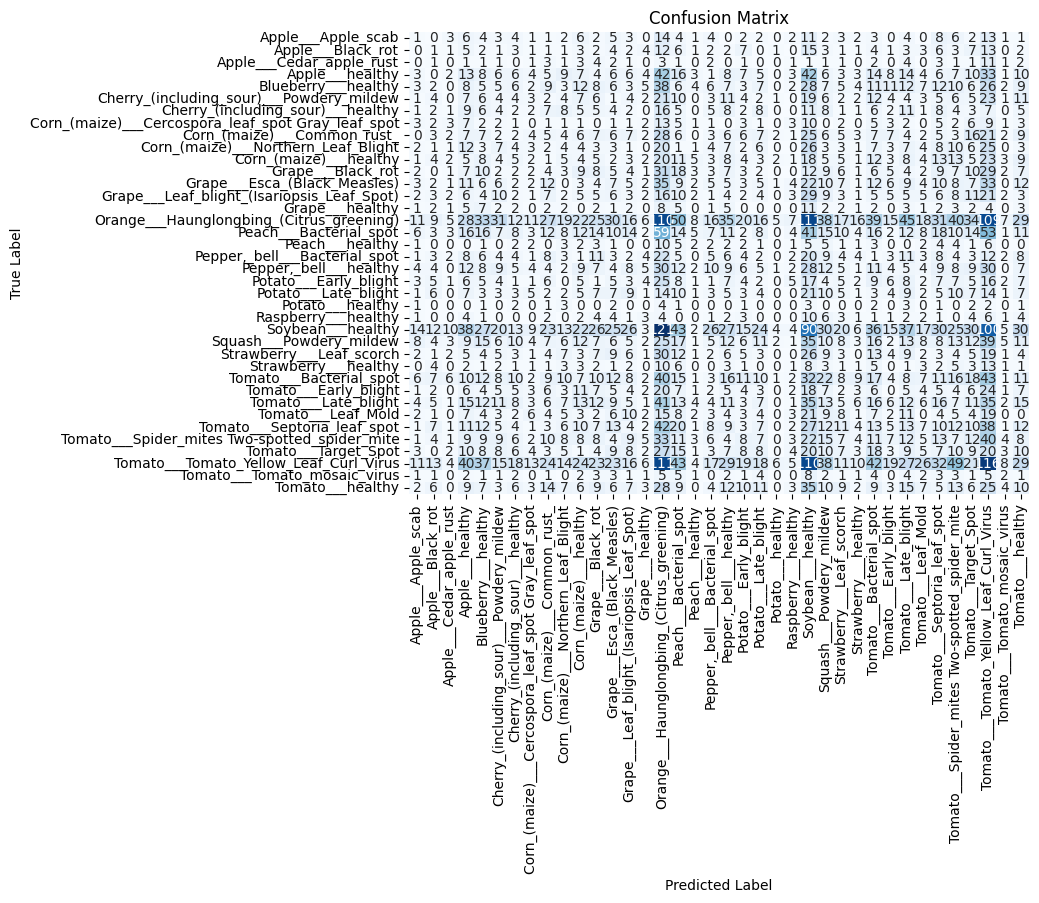

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=valid_gen.class_indices.keys(),
            yticklabels=valid_gen.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
